In [ ]:
import os
import pandas as pd
import tensorflow as tf
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from tqdm import tqdm_notebook
from tensorflow.keras import utils
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


##Data Exploration


In [ ]:
#Initialise directories
PATH = '/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment 3/data/'

train_images = np.load(PATH +'k49-train-imgs.npz')['arr_0']
test_images = np.load(PATH +'k49-test-imgs.npz')['arr_0']
train_labels = np.load(PATH +'k49-train-labels.npz')['arr_0']
test_labels = np.load(PATH +'k49-test-labels.npz')['arr_0']
char_df = pd.read_csv(PATH+'k49_classmap.csv', encoding = 'utf-8')

Dataset Shapes

In [ ]:
print("K49 train shape:", train_images.shape)
print("K49 test shape:", test_images.shape)
print("K49 train shape:", train_labels.shape)
print("K49 test shape:", test_labels.shape)
print("K49 character map shape:", char_df.shape)

K49 train shape: (232365, 28, 28)
K49 test shape: (38547, 28, 28)
K49 train shape: (232365,)
K49 test shape: (38547,)
K49 character map shape: (49, 3)


In [ ]:
char_df

,index,codepoint,char
0,0,U+3042,あ
1,1,U+3044,い
2,2,U+3046,う
3,3,U+3048,え
4,4,U+304A,お
5,5,U+304B,か
6,6,U+304D,き
7,7,U+304F,く
8,8,U+3051,け
9,9,U+3053,こ


Class Distribution

In [ ]:
print('Percent for each category:',np.bincount(train_labels)/len(train_labels)*100)

Percent for each category: [2.58214447 2.58214447 2.58214447 0.33438771 2.58214447 2.58214447
 2.58214447 2.58214447 2.02870484 2.58214447 2.58214447 2.58214447
 2.58214447 1.79243862 1.66419211 2.58214447 1.10386676 2.58214447
 2.58214447 2.58214447 2.58214447 2.58214447 0.88782734 1.05480602
 2.58214447 2.58214447 2.20859424 2.58214447 2.58214447 0.85770232
 2.58214447 1.31689368 0.73935403 1.46063306 2.58214447 2.58214447
 0.68771114 2.58214447 2.58214447 2.58214447 2.58214447 2.58214447
 0.9205345  1.03156672 0.17945904 0.16870011 2.58214447 2.58214447
 1.51614916]


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12354 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12358 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12360 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12362 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12363 missing from current font.
  font.set_

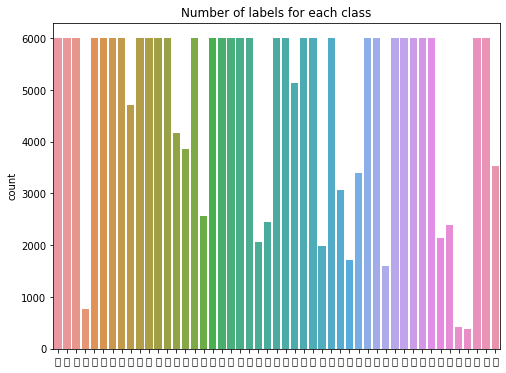

In [ ]:
labels = char_df['char']
f, ax = plt.subplots(1,1, figsize=(8,6))
g = sns.countplot(train_labels)
g.set_title("Number of labels for each class")
g.set_xticklabels(labels)
plt.show()    

In [ ]:
def plot_sample_images_data(images, labels):
    plt.figure(figsize=(12,12))
    for i in tqdm_notebook(range(10)):
        imgs = images[np.where(labels == i)]
        lbls = labels[np.where(labels == i)]
        for j in range(10):
            plt.subplot(10,10,i*10+j+1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(imgs[j], cmap=plt.cm.binary)
            plt.xlabel(lbls[j])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


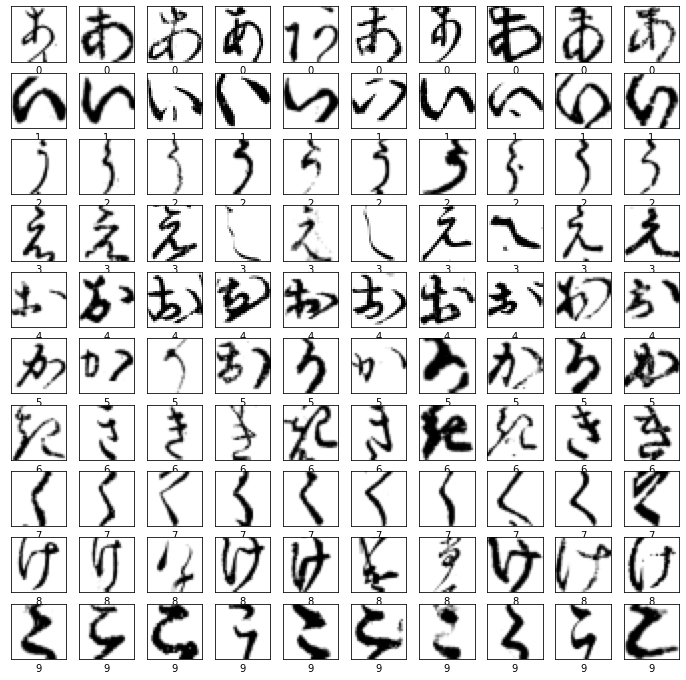

In [ ]:
plot_sample_images_data(train_images, train_labels)

#VGG

In [ ]:
#Initialise directories
PATH = '/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment 3/data/'

train_images = np.load(PATH +'k49-train-imgs.npz')['arr_0']
test_images = np.load(PATH +'k49-test-imgs.npz')['arr_0']
train_labels = np.load(PATH +'k49-train-labels.npz')['arr_0']
test_labels = np.load(PATH +'k49-test-labels.npz')['arr_0']
char_df = pd.read_csv(PATH+'k49_classmap.csv', encoding = 'utf-8')

##Data Preprocessing

Reshape images



In [ ]:
train_images = train_images.reshape(-1, 784)
test_images = test_images.reshape(-1, 784)
train_images = np.dstack([train_images] * 3)
test_images = np.dstack([test_images]* 3)

train_images = train_images.reshape(-1, 28, 28, 3)
test_images = test_images.reshape(-1, 28, 28, 3)

print("Shape of train_images: {}".format(train_images.shape))
print("Shape of test_images: {}".format(test_images.shape))

Shape of train_images: (232365, 28, 28, 3)
Shape of test_images: (38547, 28, 28, 3)


Change labels to categorical

In [ ]:
train_labels = utils.to_categorical(train_labels, num_classes = 49)
test_labels = utils.to_categorical(test_labels, num_classes = 49)

print("Shape of train_labels: {}".format(train_labels.shape))
print("Shape of test_labels: {}".format(test_labels.shape))

Shape of train_labels: (232365, 49)
Shape of test_labels: (38547, 49)


Image Augmentation

In [ ]:
from keras.applications.vgg16 import preprocess_input

train_datagen = ImageDataGenerator(
      rescale=1./255,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      preprocessing_function = preprocess_input)

test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2, preprocessing_function = preprocess_input)

train_generator = train_datagen.flow(
        train_images, 
        train_labels,  
        batch_size=32)

validation_generator = test_datagen.flow(
        test_images,
        test_labels,
        batch_size=32,
        subset = 'validation')

test_generator = test_datagen.flow(
        test_images,
        test_labels,
        batch_size=32,
        subset = 'training')

##Model Architecture [Basic]

Imports

In [ ]:
from tensorflow.keras.applications import VGG16

VGG16conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
#Initialise sequential model
VGG16model = models.Sequential()
#Add pretrained VGG16 weights to model, omitting dense layers
VGG16model.add(VGG16conv_base)
#Flatten convolution layers
VGG16model.add(layers.Flatten()
#Add dense layer
VGG16model.add(layers.Dense(256, activation='relu'))
#Output Layer
VGG16model.add(layers.Dense(49, activation='softmax'))

Model Information

In [ ]:
VGG16conv_base.summary()
for layer in VGG16conv_base.layers[:-11]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in VGG16conv_base.layers:
    print(layer, layer.trainable)

VGG16model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Model Checkpointing and Compilation


In [ ]:
filepath='/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment 3/Classification_weights/VGG/VGG16weightsBASIC.{epoch:02d}-{val_loss:.2f}.hdf5'
checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
earlyStop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

VGG16model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['acc'])

Train Model

In [ ]:
VGG16_results = VGG16model.fit(
      train_generator,
      epochs=30, 
      validation_data=validation_generator,
      callbacks = [checkpoint, earlyStop], 
      verbose=1) 

Epoch 1/30


##Model Architecture [Custom]

Imports

In [ ]:
from tensorflow.keras.applications import VGG16

VGG16conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
#Initialise sequential model
VGG16model = models.Sequential()
#Add pretrained VGG16 weights to model, omitting dense layers
VGG16model.add(VGG16conv_base)
#Flatten convolution layers
VGG16model.add(layers.Flatten())
#Add dense layer
VGG16model.add(layers.Dense(512, activation='relu'))
VGG16model.add(layers.Dropout(0.5))
VGG16model.add(layers.BatchNormalization())
#Add dense layer
VGG16model.add(layers.Dense(256, activation='relu'))
VGG16model.add(layers.Dropout(0.2))
VGG16model.add(layers.BatchNormalization())
#Output Layer
VGG16model.add(layers.Dense(49, activation='softmax'))

Model Information

In [ ]:
VGG16conv_base.summary()
for layer in VGG16conv_base.layers[:-4]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in VGG16conv_base.layers:
    print(layer, layer.trainable)

VGG16model.summary()

Model Checkpointing and Compilation

In [ ]:
filepath='/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment 3/Classification_weights/VGG/VGG16weights.{epoch:02d}-{val_loss:.2f}.hdf5'
checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
earlyStop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

VGG16model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['acc'])

Train Model

In [ ]:
VGG16_results = VGG16model.fit(
      train_generator,
      steps_per_epoch= train_images.size/train_generator.batch_size,  
      epochs=30, 
      validation_data=validation_generator,
      validation_steps= (test_images.size*0.4)/validation_generator.batch_size, 
      callbacks = [checkpoint, earlyStop], 
      verbose=1) 

Save Model

In [ ]:
import matplotlib.pyplot as plt
acc = VGG16_results.history['acc']
val_acc = VGG16_results.history['val_acc']
loss = VGG16_results.history['loss']
val_loss = VGG16_results.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
score=VGG16model.evaluate(test_generator)

#ResNet

In [ ]:
#Initialise directories
PATH = '/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment 3/data/'

train_images = np.load(PATH +'k49-train-imgs.npz')['arr_0']
test_images = np.load(PATH +'k49-test-imgs.npz')['arr_0']
train_labels = np.load(PATH +'k49-train-labels.npz')['arr_0']
test_labels = np.load(PATH +'k49-test-labels.npz')['arr_0']
char_df = pd.read_csv(PATH+'k49_classmap.csv', encoding = 'utf-8')

##Data Preprocessing


Reshape images

In [ ]:
train_images = train_images.reshape(-1, 784)
test_images = test_images.reshape(-1, 784)
train_images = np.dstack([train_images] * 3)
test_images = np.dstack([test_images]* 3)

train_images = train_images.reshape(-1, 28, 28, 3)
test_images = test_images.reshape(-1, 28, 28, 3)

print("Shape of train_images: {}".format(train_images.shape))
print("Shape of test_images: {}".format(test_images.shape))

Shape of train_images: (232365, 28, 28, 3)
Shape of test_images: (38547, 28, 28, 3)


Change labels to categorical

In [ ]:
train_labels = utils.to_categorical(train_labels, num_classes = 49)
test_labels = utils.to_categorical(test_labels, num_classes = 49)

print("Shape of train_labels: {}".format(train_labels.shape))
print("Shape of test_labels: {}".format(test_labels.shape))

Shape of train_labels: (232365, 49)
Shape of test_labels: (38547, 49)


Image Augmentation

In [ ]:
from keras.applications.resnet50 import preprocess_input

train_datagen = ImageDataGenerator(
      rescale=1./255,
      shear_range=0.2,
      zoom_range=0.2,
      fill_mode='nearest',
      preprocessing_function = preprocess_input)

test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2, preprocessing_function = preprocess_input)

train_generator = train_datagen.flow(
        train_images, 
        train_labels,  
        batch_size=32)

validation_generator = test_datagen.flow(
        test_images,
        test_labels,
        batch_size=32,
        subset = 'validation')

test_generator = test_datagen.flow(
        test_images,
        test_labels,
        batch_size=32,
        subset = 'training')

##Model Architecture [Basic]

Imports

In [ ]:
from tensorflow.keras.applications import ResNet50

ResNet50conv_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
#Initialise sequential model
ResNet50model = models.Sequential()
#Add pretrained ResNet50 weights to model, omitting dense layers
ResNet50model.add(ResNet50conv_base)
#Pool
ResNet50model.add(layers.GlobalAveragePooling2D())
#Add dense layer
ResNet50model.add(layers.Dense(256, activation='relu'))
#Output Layer
ResNet50model.add(layers.Dense(49, activation='softmax'))

94773248/94765736 [==============================] - 1s 0us/step


Model Information

In [ ]:
#Output Layer
ResNet50conv_base.summary()
for layer in ResNet50conv_base.layers:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in ResNet50conv_base.layers:
    print(layer, layer.trainable)

ResNet50model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

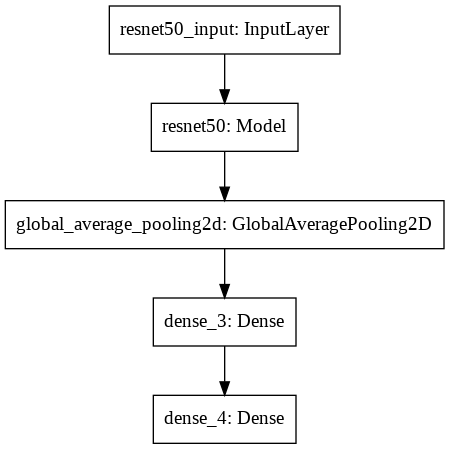

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(ResNet50model, to_file='model.png')

Model Checkpointing & Compilation

In [ ]:
filepath='/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment 3/Classification_weights/ResNet50/ResNet50weightsBASIC.{epoch:02d}-{val_loss:.2f}.hdf5'
checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
earlyStop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

ResNet50model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['acc'])

Model Training

In [ ]:
ResNet50_results = ResNet50model.fit(
      train_generator, 
      epochs=30, 
      validation_data=validation_generator,
      callbacks = [checkpoint, earlyStop], 
      verbose=1) 

Epoch 1/30
7262/7262 [==============================] - 233s 32ms/step - loss: 2.6882 - acc: 0.2672 - val_loss: 2.9257 - val_acc: 0.2574
Epoch 2/30
7262/7262 [==============================] - 229s 32ms/step - loss: 2.5276 - acc: 0.3118 - val_loss: 2.8469 - val_acc: 0.2849
Epoch 3/30
7262/7262 [==============================] - 227s 31ms/step - loss: 2.4962 - acc: 0.3207 - val_loss: 2.8450 - val_acc: 0.2683
Epoch 4/30
7262/7262 [==============================] - 230s 32ms/step - loss: 2.4759 - acc: 0.3260 - val_loss: 2.8690 - val_acc: 0.2762
Epoch 5/30
7262/7262 [==============================] - 228s 31ms/step - loss: 2.4636 - acc: 0.3312 - val_loss: 2.8397 - val_acc: 0.2856
Epoch 6/30
7262/7262 [==============================] - 229s 32ms/step - loss: 2.4498 - acc: 0.3353 - val_loss: 2.8778 - val_acc: 0.2738
Epoch 7/30
7262/7262 [==============================] - 228s 31ms/step - loss: 2.4447 - acc: 0.3360 - val_loss: 2.9449 - val_acc: 0.2610
Epoch 8/30
 858/7262 [==>................

KeyboardInterrupt: ignored

##Model Architecture [Custom]

Imports

In [ ]:
from tensorflow.keras.applications import ResNet50

ResNet50conv_base = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
#Initialise sequential model
ResNet50model = models.Sequential()
#Add pretrained ResNet50 weights to model, omitting dense layers
ResNet50model.add(ResNet50conv_base)
#Pool
ResNet50model.add(layers.GlobalAveragePooling2D())
#Add dense layer
ResNet50model.add(layers.Dense(512, activation='relu'))
ResNet50model.add(layers.Dropout(0.2))
#Add dense layer
ResNet50model.add(layers.Dense(256, activation='relu'))
ResNet50model.add(layers.Dropout(0.1))
#Output Layer
ResNet50model.add(layers.Dense(49, activation='softmax'))

Model Information

In [ ]:
#Output Layer
ResNet50conv_base.summary()
for layer in ResNet50conv_base.layers[29:]:
    layer.trainable = False;
 
# Check the trainable status of the individual layers
for layer in ResNet50conv_base.layers:
    print(layer, layer.trainable)

ResNet50model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

Model Checkpointing & Compilation

In [ ]:
filepath='/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment 3/Classification_weights/ResNet50/ResNet50weightsCUSTOM.{epoch:02d}-{val_loss:.2f}.hdf5'
checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
earlyStop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

ResNet50model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=['acc'])

Train Model

In [ ]:
ResNet50_results = ResNet50model.fit(
      train_generator, 
      epochs=30, 
      validation_data=validation_generator,
      callbacks = [checkpoint, earlyStop], 
      verbose=1) 

Epoch 1/30
7262/7262 [==============================] - 538s 74ms/step - loss: 0.8441 - acc: 0.7723 - val_loss: 0.8029 - val_acc: 0.7822
Epoch 2/30
7262/7262 [==============================] - 535s 74ms/step - loss: 0.4907 - acc: 0.8680 - val_loss: 0.7635 - val_acc: 0.8067
Epoch 3/30
7262/7262 [==============================] - 533s 73ms/step - loss: 0.4279 - acc: 0.8870 - val_loss: 0.5538 - val_acc: 0.8529
Epoch 4/30
7262/7262 [==============================] - 533s 73ms/step - loss: 0.3913 - acc: 0.8976 - val_loss: 0.5837 - val_acc: 0.8489
Epoch 5/30
7262/7262 [==============================] - 534s 74ms/step - loss: 0.3713 - acc: 0.9035 - val_loss: 0.4850 - val_acc: 0.8831
Epoch 6/30
7262/7262 [==============================] - 534s 73ms/step - loss: 0.3564 - acc: 0.9091 - val_loss: 0.4153 - val_acc: 0.8961
Epoch 7/30
7262/7262 [==============================] - 532s 73ms/step - loss: 0.3440 - acc: 0.9113 - val_loss: 0.4649 - val_acc: 0.8877
Epoch 8/30
7262/7262 [===================

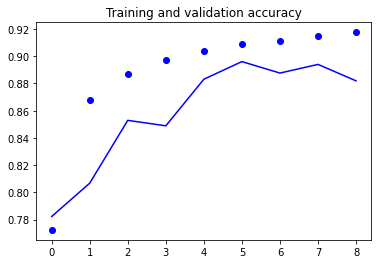

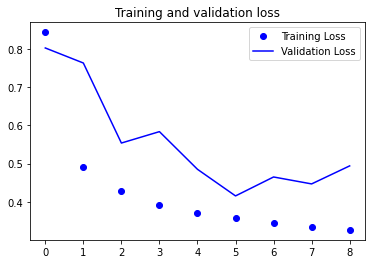

In [ ]:
import matplotlib.pyplot as plt
acc = ResNet50_results.history['acc']
val_acc = ResNet50_results.history['val_acc']
loss = ResNet50_results.history['loss']
val_loss = ResNet50_results.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
score=ResNet50model.evaluate(test_generator)

964/964 [==============================] - 27s 28ms/step - loss: 0.4998 - acc: 0.8796


In [ ]:
ResNet50model.save('/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment 3/Models/') 

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/42028-DL-CNN-2020/Assignment 3/Models/assets


#Inception

In [ ]:
#Initialise directories
PATH = '/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment 3/data/'

train_images = np.load(PATH +'k49-train-imgs.npz')['arr_0']
test_images = np.load(PATH +'k49-test-imgs.npz')['arr_0']
train_labels = np.load(PATH +'k49-train-labels.npz')['arr_0']
test_labels = np.load(PATH +'k49-test-labels.npz')['arr_0']
char_df = pd.read_csv(PATH+'k49_classmap.csv', encoding = 'utf-8')

##Data Preprocessing

Reshape Images

In [ ]:
train_images = train_images.reshape(-1, 784)
test_images = test_images.reshape(-1, 784)
train_images = np.dstack([train_images] * 3)
test_images = np.dstack([test_images]* 3)

train_images = train_images.reshape(-1, 28, 28, 3)
test_images = test_images.reshape(-1, 28, 28, 3)

print("Shape of train_images: {}".format(train_images.shape))
print("Shape of test_images: {}".format(test_images.shape))

Change labels to categorical

In [ ]:
train_labels = utils.to_categorical(train_labels, num_classes = 49)
test_labels = utils.to_categorical(test_labels, num_classes = 49)

print("Shape of train_labels: {}".format(train_labels.shape))
print("Shape of test_labels: {}".format(test_labels.shape))

Image Augmentation

In [ ]:
from keras.applications.inception_resnet_v2 import preprocess_input

train_datagen = ImageDataGenerator(
      rescale=1./255,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      preprocessing_function = preprocess_input)

test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.4, preprocessing_function = preprocess_input)

train_generator = train_datagen.flow(
        train_images, 
        train_labels,  
        batch_size=32)

validation_generator = test_datagen.flow(
        test_images,
        test_labels,
        batch_size=32,
        subset = 'validation')

test_generator = test_datagen.flow(
        test_images,
        test_labels,
        batch_size=32,
        subset = 'training')

##Model Architecture [Basic]

Imports

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2

InceptionResNetV2conv_base = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
#Initialise sequential model
InceptionResNetV2model = models.Sequential()
#Add pretrained ResNet50 weights to model, omitting dense layers
InceptionResNetV2model.add(InceptionResNetV2conv_base)
#Flatten convolution layers
InceptionResNetV2model.add(layers.Flatten())
#Add dense layer
InceptionResNetV2model.add(layers.Dense(512, activation='relu'))
InceptionResNetV2model.add(layers.Dropout(0.5))
InceptionResNetV2model.add(layers.BatchNormalization())
#Add dense layer
InceptionResNetV2model.add(layers.Dense(256, activation='relu'))
InceptionResNetV2model.add(layers.Dropout(0.2))
InceptionResNetV2model.add(layers.BatchNormalization())
#Output Layer
InceptionResNetV2model.add(layers.Dense(49, activation='softmax'))

Model Information

In [ ]:
#Output Layer
InceptionResNetV2conv_base.summary()
for layer in InceptionResNetV2conv_base.layers[:-4]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in InceptionResNetV2conv_base.layers:
    print(layer, layer.trainable)

InceptionResNetV2model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_203 (Conv2D)             (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_205 (BatchN (None, 149, 149, 32) 96          conv2d_203[0][0]                 
__________________________________________________________________________________________________
activation_203 (Activation)     (None, 149, 149, 32) 0           batch_normalization_205[0][0]    
________________________________________________________________________________

Model Checkpointing and Compilation

In [ ]:
filepath='/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment 3/Classification_weights/InceptionResNetV2/InceptionResNetV20weights.{epoch:02d}-{val_loss:.2f}.hdf5'
checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
earlyStop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

InceptionResNetV2model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['acc'])

Train Model

In [ ]:
InceptionResNetV2_results = InceptionResNetV2model.fit(
      train_generator,
      steps_per_epoch= train_images.size/train_generator.batch_size,  
      epochs=30, 
      validation_data=validation_generator,
      validation_steps= (test_images.size*0.4)/validation_generator.batch_size, 
      callbacks = [checkpoint, earlyStop], 
      verbose=1) 

Epoch 1/30


##Model Architecture [Custom]

Imports

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2

InceptionResNetV2conv_base = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
#Initialise sequential model
InceptionResNetV2model = models.Sequential()
#Add pretrained ResNet50 weights to model, omitting dense layers
InceptionResNetV2model.add(InceptionResNetV2conv_base)
#Flatten convolution layers
InceptionResNetV2model.add(layers.Flatten())
#Add dense layer
InceptionResNetV2model.add(layers.Dense(512, activation='relu'))
InceptionResNetV2model.add(layers.Dropout(0.5))
InceptionResNetV2model.add(layers.BatchNormalization())
#Add dense layer
InceptionResNetV2model.add(layers.Dense(256, activation='relu'))
InceptionResNetV2model.add(layers.Dropout(0.2))
InceptionResNetV2model.add(layers.BatchNormalization())
#Output Layer
InceptionResNetV2model.add(layers.Dense(49, activation='softmax'))

Model Information

In [ ]:
#Output Layer
InceptionResNetV2conv_base.summary()
for layer in InceptionResNetV2conv_base.layers[:-4]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in InceptionResNetV2conv_base.layers:
    print(layer, layer.trainable)

InceptionResNetV2model.summary()

Model Checkpointing and Compilation

In [ ]:
filepath='/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment 3/Classification_weights/InceptionResNetV2/InceptionResNetV20weights.{epoch:02d}-{val_loss:.2f}.hdf5'
checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
earlyStop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

InceptionResNetV2model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['acc'])

Train Model

In [ ]:
InceptionResNetV2_results = InceptionResNetV2model.fit(
      train_generator,
      steps_per_epoch= train_images.size/train_generator.batch_size,  
      epochs=30, 
      validation_data=validation_generator,
      validation_steps= (test_images.size*0.4)/validation_generator.batch_size, 
      callbacks = [checkpoint, earlyStop], 
      verbose=1) 

#Original (Selected Model)

In [ ]:
#Initialise directories
PATH = '/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment 3/data/'

train_images = np.load(PATH +'k49-train-imgs.npz')['arr_0']
test_images = np.load(PATH +'k49-test-imgs.npz')['arr_0']
train_labels = np.load(PATH +'k49-train-labels.npz')['arr_0']
test_labels = np.load(PATH +'k49-test-labels.npz')['arr_0']
char_df = pd.read_csv(PATH+'k49_classmap.csv', encoding = 'utf-8')

##Data Preprocessing

Reshape Images

In [ ]:
train_images = train_images.reshape(-1, 784)
test_images = test_images.reshape(-1, 784)
train_images = np.dstack([train_images] * 3)
test_images = np.dstack([test_images]* 3)

train_images = train_images.reshape(-1, 28, 28, 3)
test_images = test_images.reshape(-1, 28, 28, 3)

print("Shape of train_images: {}".format(train_images.shape))
print("Shape of test_images: {}".format(test_images.shape))

Shape of train_images: (232365, 28, 28, 3)
Shape of test_images: (38547, 28, 28, 3)


Change Labels to Categorical

In [ ]:
train_labels = utils.to_categorical(train_labels, num_classes = 49)
test_labels = utils.to_categorical(test_labels, num_classes = 49)

print("Shape of train_labels: {}".format(train_labels.shape))
print("Shape of test_labels: {}".format(test_labels.shape))

Shape of train_labels: (232365, 49)
Shape of test_labels: (38547, 49)


Image Augmentation

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=0.08,
      shear_range=0.08,
      zoom_range=0.2,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow(
        train_images, 
        train_labels,  
        batch_size=32)

validation_generator = test_datagen.flow(
        test_images,
        test_labels,
        batch_size=32,
        shuffle=False,
        subset = 'validation')

test_generator = test_datagen.flow(
        test_images,
        test_labels,
        batch_size=32,
        shuffle=False,
        subset = 'training')

##Model Architecture

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (5, 5), strides=(1, 1), activation='relu', input_shape=(28, 28, 3)))
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(96, (3, 3), strides=(1, 1), activation='relu'))
model.add(layers.Conv2D(96, (3, 3), strides=(1, 1), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(49, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 32)        25632     
_________________________________________________________________
batch_normalization (BatchNo (None, 10, 10, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 64)          36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 6, 64)          2

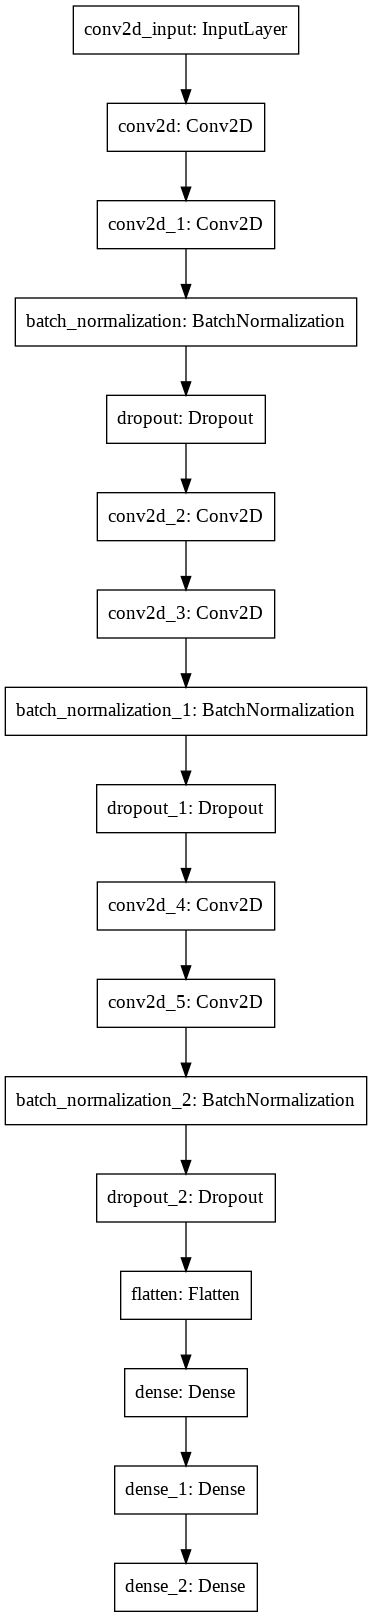

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

Model Checkpointing and Compilation

In [ ]:
filepath='/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment 3/Classification_weights/Original/Originalweights.{epoch:02d}-{val_loss:.2f}.hdf5'
checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
earlyStop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment 3/Classification_weights//content/gdrive/My Drive/42028-DL-CNN-2020/Assignment 3/Classification_weights/ patience=3)

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=['acc'])

Train Model

In [ ]:
Original_results = model.fit(
      train_generator, 
      epochs=30, 
      validation_data=validation_generator,
      callbacks = [checkpoint, earlyStop], 
      verbose=1) 

Epoch 1/30
7262/7262 [==============================] - 165s 23ms/step - loss: 0.8234 - acc: 0.7713 - val_loss: 0.5386 - val_acc: 0.8503
Epoch 2/30
7262/7262 [==============================] - 164s 23ms/step - loss: 0.4086 - acc: 0.8846 - val_loss: 0.4070 - val_acc: 0.8887
Epoch 3/30
7262/7262 [==============================] - 165s 23ms/step - loss: 0.3301 - acc: 0.9070 - val_loss: 0.3117 - val_acc: 0.9150
Epoch 4/30
7262/7262 [==============================] - 165s 23ms/step - loss: 0.2862 - acc: 0.9186 - val_loss: 0.3100 - val_acc: 0.9198
Epoch 5/30
7262/7262 [==============================] - 165s 23ms/step - loss: 0.2524 - acc: 0.9279 - val_loss: 0.2684 - val_acc: 0.9306
Epoch 6/30
7262/7262 [==============================] - 164s 23ms/step - loss: 0.2349 - acc: 0.9326 - val_loss: 0.2921 - val_acc: 0.9241
Epoch 7/30
7262/7262 [==============================] - 165s 23ms/step - loss: 0.2179 - acc: 0.9374 - val_loss: 0.2511 - val_acc: 0.9381
Epoch 8/30
7262/7262 [===================

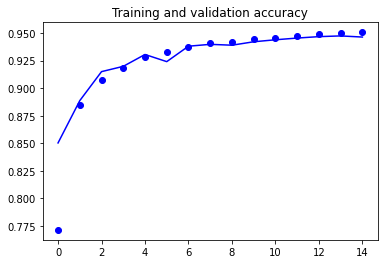

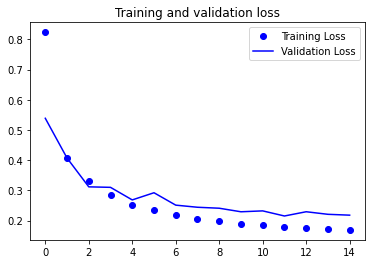

In [ ]:
import matplotlib.pyplot as plt
acc = Original_results.history['acc']
val_acc = Original_results.history['val_acc']
loss = Original_results.history['loss']
val_loss = Original_results.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
score=model.evaluate(test_generator)

##Loading Previous Models

In [ ]:
model_modify=tf.keras.models.load_model('/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment 3/Classification_weights/Original/Little augment/Originalweights.12-0.22.hdf5') 

In [ ]:
score=model_modify.evaluate(test_generator)

964/964 [==============================] - 3s 4ms/step - loss: 0.2184 - acc: 0.9443


##Insight Into Results

Confusion Matrix
[[0.9721871  0.         0.         ... 0.         0.         0.        ]
 [0.         0.96095718 0.         ... 0.         0.         0.        ]
 [0.         0.         0.96954315 ... 0.         0.00126904 0.00126904]
 ...
 [0.         0.         0.         ... 0.98230088 0.00126422 0.00126422]
 [0.         0.         0.         ... 0.         0.9887218  0.        ]
 [0.         0.         0.         ... 0.         0.00217391 0.86956522]]


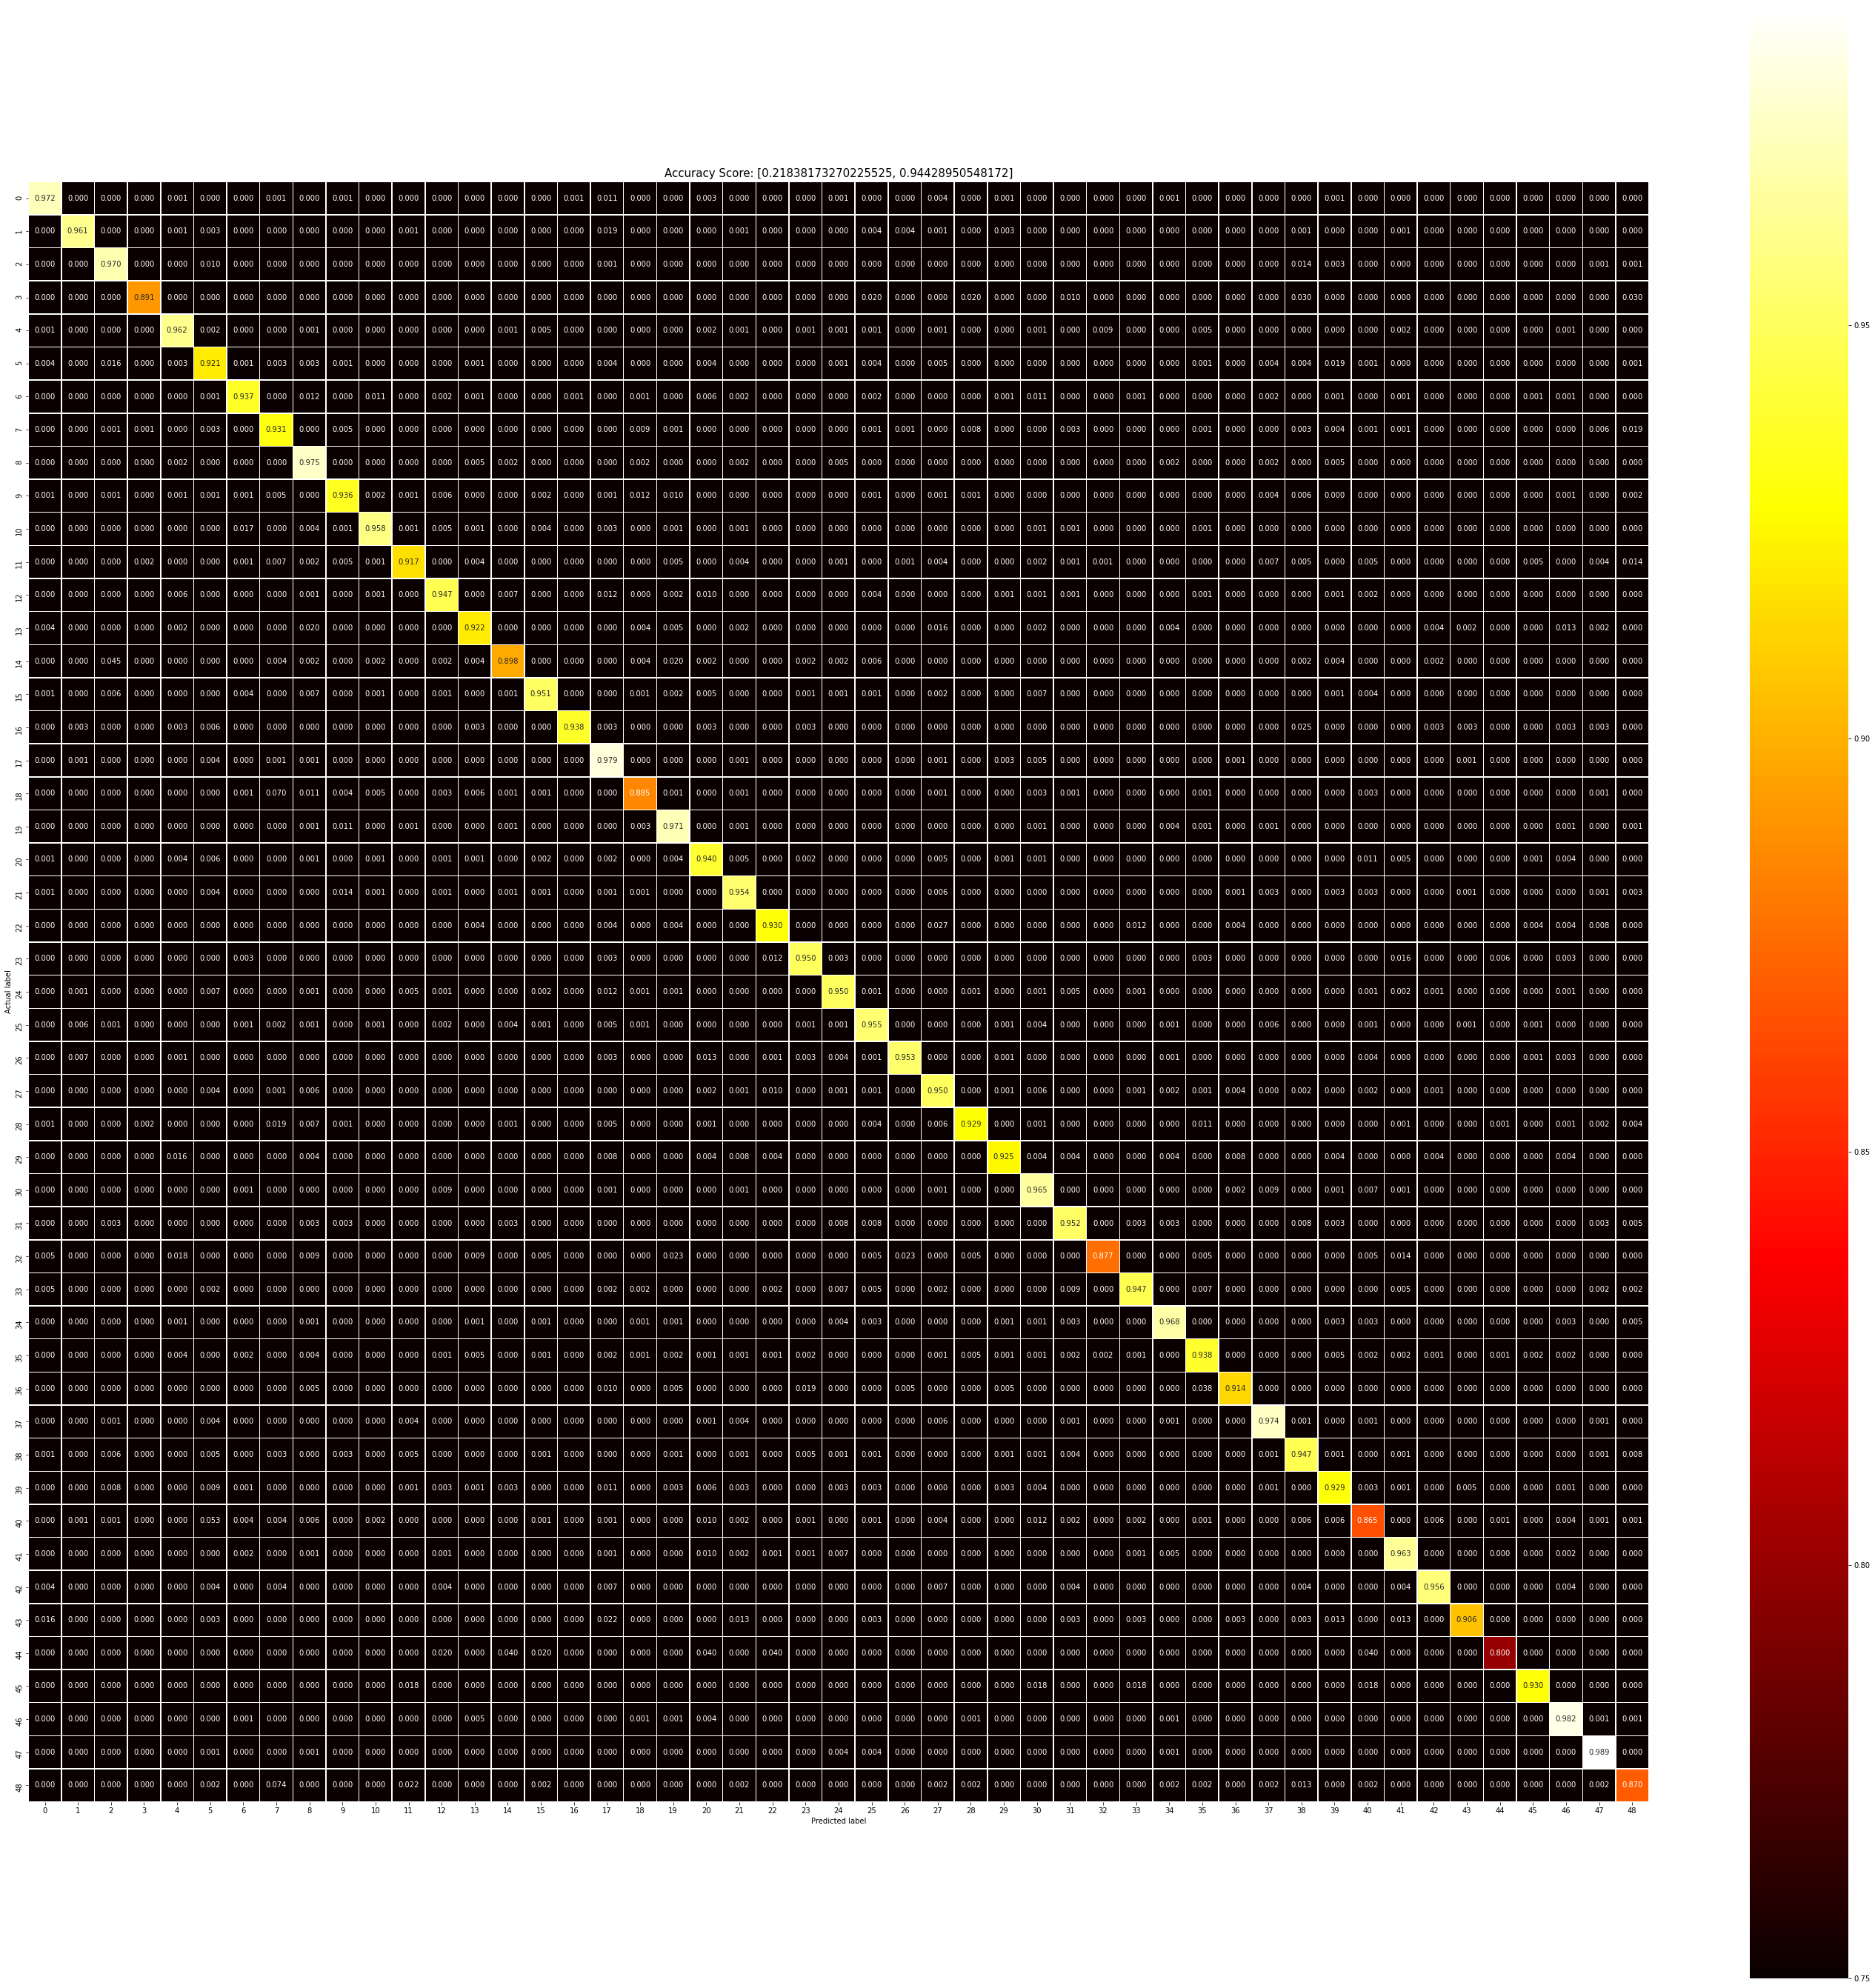

In [ ]:
from sklearn import metrics

Y_pred = model_modify.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
rounded_labels=np.argmax(test_labels, axis=1)
rounded_labels_range = rounded_labels[7709:]
cm = metrics.confusion_matrix(rounded_labels_range, y_pred, normalize='true')
print(cm)

plt.figure(figsize=(49,49))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'hot', vmin=0.75);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
model.save('/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment 3/Models/') 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/gdrive/My Drive/42028-DL-CNN-2020/Assignment 3/Models/assets


In [ ]:
y_true = rounded_labels[7709:]

correct = np.nonzero(y_pred==y_true)[0]
incorrect = np.nonzero(y_pred!=y_true)[0]

print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 29188
Incorrect predicted classes: 1650


In [ ]:
from sklearn.metrics import classification_report
target_names = ["Class {} ({}):".format(i, char_df[char_df['index']==i]['char'].item()) for i in range(49)]
print(classification_report(y_true, y_pred, target_names=target_names))

               precision    recall  f1-score   support

 Class 0 (あ):       0.96      0.97      0.97       791
 Class 1 (い):       0.98      0.97      0.98       794
 Class 2 (う):       0.94      0.98      0.96       788
 Class 3 (え):       0.90      0.88      0.89       101
 Class 4 (お):       0.97      0.94      0.95       808
 Class 5 (か):       0.95      0.84      0.89       796
 Class 6 (き):       0.96      0.94      0.95       804
 Class 7 (く):       0.91      0.87      0.89       785
 Class 8 (け):       0.96      0.96      0.96       609
 Class 9 (こ):       0.95      0.95      0.95       818
Class 10 (さ):       0.99      0.96      0.97       786
Class 11 (し):       0.95      0.93      0.94       804
Class 12 (す):       0.90      0.97      0.93       815
Class 13 (せ):       0.96      0.90      0.93       548
Class 14 (そ):       0.95      0.89      0.92       510
Class 15 (た):       0.94      0.97      0.96       813
Class 16 (ち):       0.98      0.96      0.97       323
Class 17 